<a href="https://colab.research.google.com/github/111DataScienceWizard/TREBIRTH/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
TrainingData = pd.read_csv("/content/Training_Data.csv")
TestData = pd.read_csv("/content/Testing_Data (1).csv")

PyWavelets is a Python library for wavelet transforms and provides various functions for signal processing and image compression.

In [ ]:
!pip install PyWavelets

In [ ]:
import os
import pywt
import numpy as np
from scipy.ndimage import zoom
from scipy.io import loadmat
from skimage.transform import resize
from skimage import exposure
from skimage.util import img_as_ubyte
from keras.preprocessing.image import array_to_img

In [ ]:
def helperSaveTFR(wt, ii, parentDir, SetDir, ClassDir):
    imgLoc = os.path.join(parentDir, SetDir, ClassDir)
    if not os.path.exists(imgLoc):
        os.makedirs(imgLoc)
    imFileName = f"{SetDir}_{ClassDir}_{ii}.jpg"
    resized_wt = resize(np.abs(wt), (227, 227))

    rescaled_wt = exposure.rescale_intensity(resized_wt, in_range=(-1, 1), out_range=(0, 1))

    im = np.expand_dims(rescaled_wt, axis=-1)
    img = array_to_img(im)
    img.save(os.path.join(imgLoc, imFileName))


In [ ]:
import pywt

def helpergenWaveletTFImg1(parentDir, trainingSet, testSet):
    taskNm = ["Training", "Training", "Test", "Test"]
    shapeNm = ["HeaData", "InfData", "HeaData", "InfData"]
    print('Generating Time-Frequency Representations...Please Wait')
    for ns in range(1, 5):
        if ns % 4 == 1:
            tt = trainingSet.iloc[:, :49]
            SetDir = 'Training1'
            ClassDir = 'HeaData'
        elif ns % 4 == 2:
            tt = trainingSet.iloc[:, 49:98]
            SetDir = 'Training1'
            ClassDir = 'InfData'
        elif ns % 4 == 3:
            tt = testSet.iloc[:, :10]
            SetDir = 'Test1'
            ClassDir = 'HeaData'
        else:
            tt = testSet.iloc[:, 11:20]
            SetDir = 'Test1'
            ClassDir = 'InfData'

        numSig = tt.shape[1]
        for ii in range(numSig):
            wt, _ = pywt.cwt(tt.iloc[:, ii], scales=np.arange(1, 128), wavelet='morl')
            helperSaveTFR(np.abs(wt), ii, parentDir, SetDir, ClassDir)
        print(f'   Creating {ClassDir} Time-Frequency Representations ... Done')

In [ ]:
parentDir = "/content/temp"
if not os.path.exists(parentDir):
    os.makedirs(parentDir)


In [ ]:
helpergenWaveletTFImg1(parentDir, TrainingData, TestData)

Generating Time-Frequency Representations...Please Wait
   Creating HeaData Time-Frequency Representations ... Done
   Creating InfData Time-Frequency Representations ... Done
   Creating HeaData Time-Frequency Representations ... Done
   Creating InfData Time-Frequency Representations ... Done


In [ ]:
from tensorflow.keras.applications import MobileNet

mobilenet = MobileNet(weights='imagenet', include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False)

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(...)
test_datagen = ImageDataGenerator(...)


In [ ]:
img_height = 227
img_width = 227
batch_size = 20

train_generator = train_datagen.flow_from_directory('/content/temp', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('/content/temp', target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')


Found 117 images belonging to 2 classes.
Found 117 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
6/6 [==============================] - 15s 3s/step - loss: 0.4424 - accuracy: 0.8376 - val_loss: 0.4403 - val_accuracy: 0.8376
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.4501 - accuracy: 0.8376 - val_loss: 0.4421 - val_accuracy: 0.8376
Epoch 3/10
6/6 [==============================] - 11s 2s/step - loss: 0.4419 - accuracy: 0.8376 - val_loss: 0.4386 - val_accuracy: 0.8376
Epoch 4/10
6/6 [==============================] - 14s 3s/step - loss: 0.4408 - accuracy: 0.8376 - val_loss: 0.4399 - val_accuracy: 0.8376
Epoch 5/10
6/6 [==============================] - 10s 2s/step - loss: 0.4438 - accuracy: 0.8376 - val_loss: 0.4381 - val_accuracy: 0.8376
Epoch 6/10
6/6 [==============================] - 10s 2s/step - loss: 0.4443 - accuracy: 0.8376 - val_loss: 0.4386 - val_accuracy: 0.8376
Epoch 7/10
6/6 [==============================] - 14s 3s/step - loss: 0.4420 - accuracy: 0.8376 - val_loss: 0.4386 - val_accuracy: 0.8376
Epoch 8/10
6/6 [===================

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

6/6 [==============================] - 4s 726ms/step - loss: 0.4399 - accuracy: 0.8376
Test accuracy: 0.8376068472862244


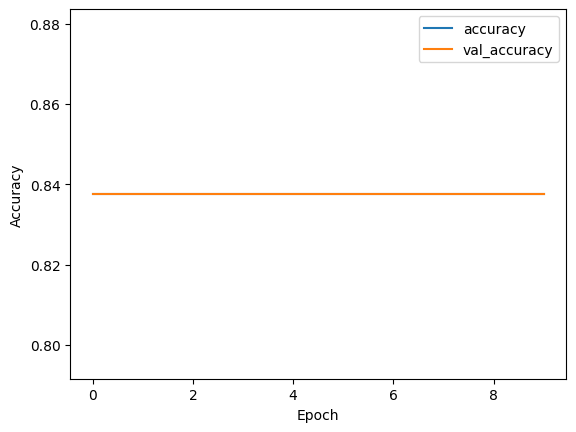

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()